## Problem Statement
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('iris.csv')

In [53]:
#First 5 rows
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [54]:
#overall information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
#statistical description about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Finding Optimum number of clusters

In [56]:
# Import KMeans 
from sklearn.cluster import KMeans

In [63]:
#Dropping "Species" Column
df.drop("Species", axis=1,inplace=True)
df = df.values

In [66]:
squared_distances = []                    
m = range(1,10)
for k_value in m:
    kmeans = KMeans(n_clusters=k_value)
    km = kmeans.fit(df)                               # training the model
    squared_distances.append(km.inertia_) 

## Elbow Plot 

Text(0.5, 1.0, 'Elbow Plot')

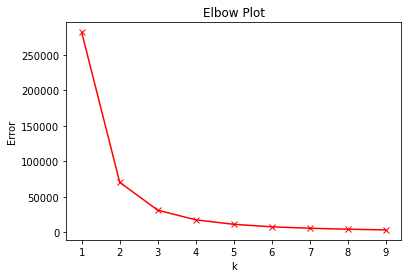

In [67]:
# Plot the Elbow method
plt.plot(m, squared_distances, 'bx-',color = 'red')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Elbow Plot')


In above plot the Error is reduced gradually up to k=3.after that it's Constant so we decide that
optimum k=3

## Training the model with K=3

In [68]:
model = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=None)

y_pred = model.fit_predict(df)

In [69]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

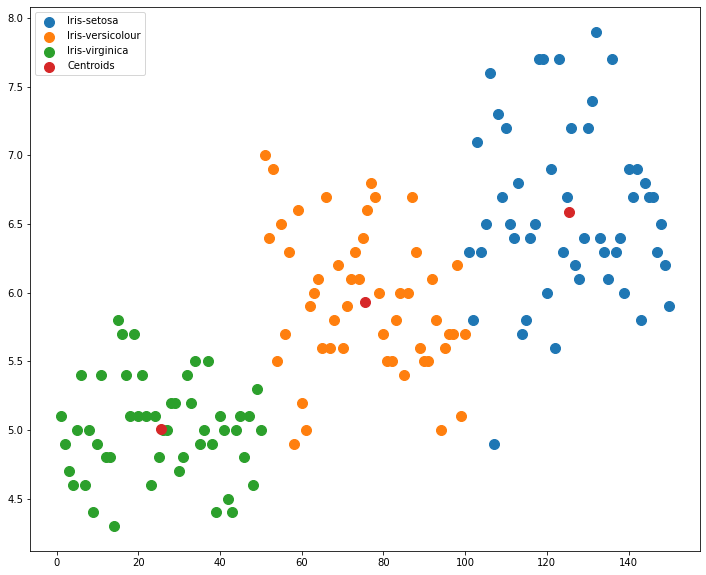

In [75]:
figure, axis = plt.subplots(figsize=(12,10))

axis.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], 
            s = 100, label = 'Iris-setosa')
axis.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], 
            s = 100, label = 'Iris-versicolour')
axis.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],
            s = 100, label = 'Iris-virginica')
axis.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, label = 'Centroids')

axis.legend()